In [2]:
import numpy as np
import pandas as pd
import torch
import torch.optim as optim
import matplotlib.pyplot as plt

# 直接在Notebook中显示输出图像
%matplotlib inline



[ 16  40  32  13   1   1   2   3   8  14  36  56  84  94 106 110  93  67
  35  37  36  34  28  39  17  17   9   6   3   2   1   8  20  53  70  93
  75  59  74  76  65  53  30  22  31   9   8   5   2   1]


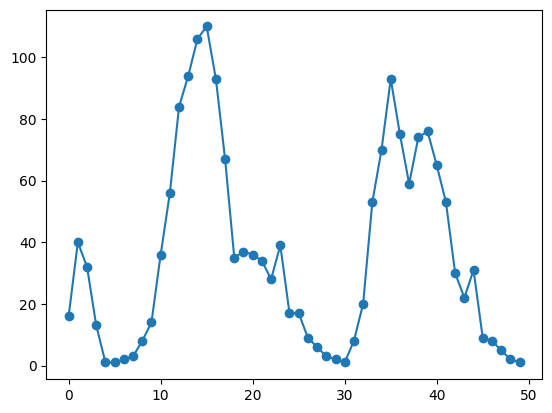

In [3]:
# 导入数据

data_path = 'hour.csv'
rides = pd.read_csv(data_path)
counts = rides['cnt'][:50]
x = np.arange(len(counts))
y = np.array(counts)
plt.plot(x, y, 'o-')
print(y)

In [63]:
# 准备数据

# 输入变量,尺寸为（50）
x = torch.FloatTensor(np.arange(len(counts), dtype=float) / len(counts)) # 归一化处理
# 输出变量，尺寸为（50）
y = torch.FloatTensor(np.array(counts, dtype=float))

In [64]:
# 建立神经网络

sz = 10
weights = torch.randn((1, sz), requires_grad=True)
biases = torch.randn((sz), requires_grad=True)
weights2 = torch.randn((sz, 1), requires_grad=True)
print(weights)
print(biases)
print(weights2)

tensor([[ 8.9615e-01,  6.2242e-01,  2.4501e+00, -1.2604e+00, -1.2122e+00,
         -6.0598e-01,  3.1042e-05,  2.0505e-01,  2.0336e+00,  2.8435e-01]],
       requires_grad=True)
tensor([ 1.9689,  1.0775, -0.2409,  0.0348,  0.4913, -1.0017, -0.1955,  0.4792,
         0.1093, -0.7235], requires_grad=True)
tensor([[ 0.4548],
        [ 1.2840],
        [-0.9617],
        [-1.2792],
        [ 0.3733],
        [-0.0381],
        [-0.1429],
        [-3.1342],
        [ 0.2409],
        [ 0.3374]], requires_grad=True)


loss: tensor(36.1671, grad_fn=<MeanBackward0>)
loss: tensor(35.8843, grad_fn=<MeanBackward0>)
loss: tensor(35.6229, grad_fn=<MeanBackward0>)
loss: tensor(35.3804, grad_fn=<MeanBackward0>)
loss: tensor(35.1549, grad_fn=<MeanBackward0>)
loss: tensor(34.9458, grad_fn=<MeanBackward0>)
loss: tensor(34.7525, grad_fn=<MeanBackward0>)
loss: tensor(34.5713, grad_fn=<MeanBackward0>)
loss: tensor(34.4024, grad_fn=<MeanBackward0>)
loss: tensor(34.2458, grad_fn=<MeanBackward0>)


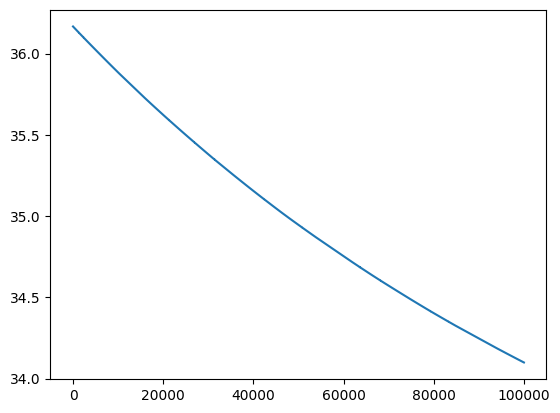

In [68]:
# 训练神经网络

learning_rate = 0.001
losses = []
x = x.view(50, -1)
y = y.view(50, -1)
for i in range(100000):
    hidden = x * weights + biases # 利用了广播机制

    hidden = torch.sigmoid(hidden)

    predictions = hidden.mm(weights2)

    loss = torch.mean((predictions - y) ** 2)
    losses.append(loss.data.numpy())

    if i % 10000 == 0:
        print('loss:', loss)
    
    # 反向传播
    loss.backward()
    weights.data.add_(- learning_rate * weights.grad.data)
    biases.data.add_(- learning_rate * biases.grad.data)
    weights2.data.add_(- learning_rate * weights2.grad.data)

    weights.grad.data.zero_()
    biases.grad.data.zero_()
    weights2.grad.data.zero_()

plt.plot(losses)    




In [69]:
print(weights)
print(biases)
print(weights2)

tensor([[  4.0947,  36.6855,  50.4175, -74.7421, -31.4593, -79.3393,   4.0607,
           4.1501,  49.5460,  54.3892]], requires_grad=True)
tensor([  5.4107, -18.3348,  -9.9237,  48.7054,  26.2841,  26.4044,   5.5916,
          5.2108, -11.8047,  -3.4332], requires_grad=True)
tensor([[-15.2371],
        [-36.0562],
        [ 54.8314],
        [-81.8734],
        [ 78.4147],
        [ 81.7425],
        [-18.0188],
        [-13.6027],
        [ 64.9349],
        [-34.6116]], requires_grad=True)


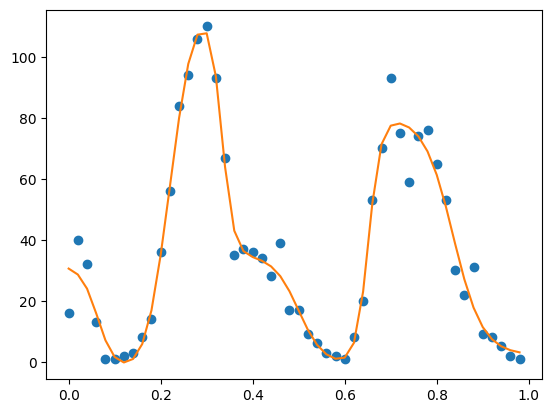

In [70]:
# 模型检验
x_data = x.data.numpy()
plt.plot(x_data, y.data.numpy(), 'o')
plt.plot(x_data, predictions.data.numpy())

tensor(6983.2534, grad_fn=<MeanBackward0>)


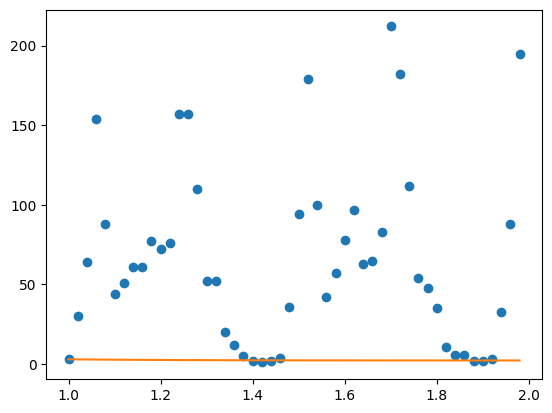

In [77]:
counts_predict = rides['cnt'][50:100]
x = torch.FloatTensor((np.arange(len(counts_predict), dtype = float) + len(counts_predict)) / len(counts))
y = torch.FloatTensor(np.array(counts_predict, dtype=float))

hidden = x.expand(sz, len(x)).t() * weights.expand(len(x), sz)
hidden = torch.sigmoid(hidden)
predictions = hidden.mm(weights2)
loss = torch.mean((predictions - y ) ** 2)
print(loss)
x_data = x.data.numpy()
plt.plot(x_data, y.data.numpy(), 'o')
plt.plot(x_data, predictions.data.numpy())